Ridge regression: 

$$ \min_{\boldsymbol{w}}\ || \boldsymbol{y} - \boldsymbol{w}^\top\boldsymbol{\Phi} ||^2 + \lambda ||\boldsymbol{w}||^2 $$

LASSO regression

$$ \min_{\boldsymbol{w}}\ || \boldsymbol{y} - \boldsymbol{w}^\top\boldsymbol{\Phi} ||^2 + \lambda ||\boldsymbol{w}|| $$

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

### Defining objective functions:

In [2]:
def loss_fn(X, Y, w): 
    return cp.norm2(X @ w - Y)**2

def regularizer_l1(w):
    return cp.norm1(w)

def regularizer_l2(w):
    return cp.norm2(w)

def objective_fn_ridge(X, Y, w, lambd): 
    return loss_fn(X, Y, w) + lambd * regularizer_l1(w)

def objective_fn_lasso(X, Y, w, lambd): 
    return loss_fn(X, Y, w) + lambd * regularizer_l2(w)

def mse(X, Y, w):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, w).value

### Generating data

The data is generated by the following linear function: 

$$\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{w}$$

where $\boldsymbol{X}$ is a $m\times n$ dimenstional matrix of inputs, $\boldsymbol{w}$ is a $n\times 1$ dimensionla vector of parameters, and $\boldsymbol{Y}$ is a $m\times 1$ dimenstional vector of outputs. 

Assume the linear model is sparse, i.e., only a relatively small percentage of $\boldsymbol{w}$ are nonzero.  

In [3]:
def generate_data(m=100, n=20, sigma=5, density=0.2):
    
    np.random.seed(1)
    
    # Parameters
    w_star = np.random.randn(n) * np.random.binomial(1, density, n)
    
    # Inputs
    X = np.random.randn(m, n)
    
    # Outputs
    Y = X.dot(w_star) + np.random.normal(0, sigma, size=m)
    
    return X, Y, w_star

In [4]:
m = 100
n = 20
sigma = 5
density = 0.2

X, Y, _ = generate_data(m, n, sigma)
X_train = X[0:int(m/2), :]
Y_train = Y[0:int(m/2)]
X_test = X[int(m/2):, :]
Y_test = Y[int(m/2):]

### Model fitting

In [5]:
lambd = cp.Parameter(nonneg = True)
lambd_values = np.logspace(-2, 3, 50)

w_ridge = cp.Variable(n)
problem_ridge = cp.Problem(cp.Minimize(objective_fn_ridge(X_train, Y_train, w_ridge, lambd)))

w_lasso = cp.Variable(n)
problem_lasso = cp.Problem(cp.Minimize(objective_fn_lasso(X_train, Y_train, w_lasso, lambd)))

train_errors_ridge = []
test_errors_ridge = []
w_values_ridge = []

train_errors_lasso = []
test_errors_lasso = []
w_values_lasso = []

for v in lambd_values: 
    lambd.value = v
    
    problem_ridge.solve()
    train_errors_ridge.append(mse(X_train, Y_train, w_ridge))
    test_errors_ridge.append(mse(X_test, Y_test, w_ridge))
    w_values_ridge.append(w_ridge.value)
    
    problem_lasso.solve()
    train_errors_lasso.append(mse(X_train, Y_train, w_lasso))
    test_errors_lasso.append(mse(X_test, Y_test, w_lasso))
    w_values_lasso.append(w_lasso.value)

/Users/xiumingliu/ml-notebooks/env/lib/python3.10/site-packages/cvxpy/problems/problem.py:1333: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


### Evaluating the model

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [7]:
def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

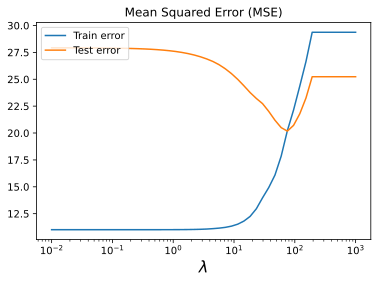

In [8]:
plot_train_test_errors(train_errors_ridge, test_errors_ridge, lambd_values)

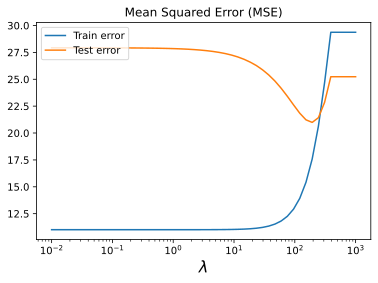

In [9]:
plot_train_test_errors(train_errors_lasso, test_errors_lasso, lambd_values)

### Regularization path

In [10]:
def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

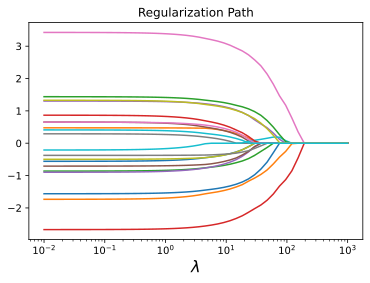

In [11]:
plot_regularization_path(lambd_values, w_values_ridge)

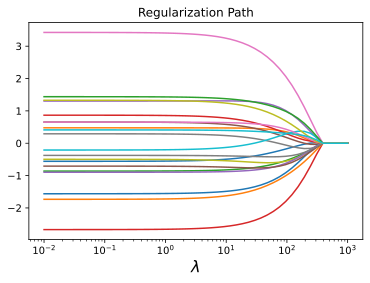

In [12]:
plot_regularization_path(lambd_values, w_values_lasso)